In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar
import sympy as sp
from scipy.sparse import csr_matrix, lil_matrix, linalg, identity
import urllib
import seaborn as sns
import re

#### 1.	Define the states and construct the transition matrix of the system, in canonical form.

***Slution:***
 
In this scenario, the system can be categorized into three genetic states based on the combination of genetic:
- <strong>H</strong>: Individual with two h genes   (will attend Harvard)
- <strong>M</strong>: Individual with mixed genes   (one h and one y, will attend Harvard)
- <strong>Y</strong>: Individual with two y genes   (will attend Yale)

Then we have:

- HH: Both individuals have the hh genotype.
- HM: One individual has the hh genotype and the other has the hy genotype.
- MM: Both individuals have the hy genotype.
- YY: Both individuals have the yy genotype.

Given these constraints, the transition probabilities are as follows:

- HH to HH: 1, as HH only produce HH offspring.
- HM to HM: HM (hy) and HM (hy) pairings can produce HH (25%), HM (50%), and MM (25%).
- MM to MM: 1 for MM offspring since HM and MM can produce MM.
- YY to YY: 1, as YY only produce YY offspring.

The transition matrix A in Canonical form of Markov chain looks like this:

$$A = \begin{pmatrix}1 & 0 & 0 & 0  \\0.25 & 0.5& 0.25& 0\\ 0 & 0  & 1 & 0\\ 0 & 0 & 0 & 1 \end{pmatrix}$$

#### 2. Numerically evolve the probability vector (i.e. multiply the probability vector by the transition matrix) to equilibrium for some different initial conditions as prescribed below. How does the initial size of the student populations affect the final probabilities? 

Try: 

i.	Equal number of people of a certain phenotype: Y = 1/2, H = 1/4, M = 1/4


***Slution:***

With equal numbers of certain people initially set as Y = $\frac{1}{2}$, H =$\frac{1}{4}$, M = $\frac{1}{4}$, and the initial state vector for scenario:

$$I = \begin{pmatrix}0.25  \\0.25 \\ 0 \\0.5 \end{pmatrix}$$


The system evolves to an equilibrium where the probabilities stabilize at approximately:

- HH (H): 37.5%
- HM (M): 0
- MM: 12.5%
- YY (Y): 50%





In [15]:
# Function to evolve the probability vector to equilibrium

def evolve_to_equilibrium(init_state, transition_matrix, iterations=1000):
    states = [init_state]
    for _ in range(iterations):
        init_state = np.dot(init_state, transition_matrix)
        states.append(init_state)
    return np.array(states)

In [29]:
# Define the transition matrix A
A = np.array([
    [1, 0, 0, 0],
    [0.25, 0.5, 0.25, 0],
    [0, 0, 1, 0], 
    [0, 0, 0, 1]
])

# Initial conditions
initial_conditions = np.array([0.25, 0.25, 0, 0.5])

# Evolving each initial condition to equilibrium
equilibriums = evolve_to_equilibrium(initial_conditions, A)

# print the equilibriums with 2 decimal places in matrix form
print('Equilibriums with 2 decimal places in matrix form')
for equilibrium in equilibriums[-10:]:
    print(np.round(equilibrium, 4))

print('\n\n')
# Define the transition matrix A
print('Equilibriums in matrix form')
for equilibrium in equilibriums[-2:]:
    print(equilibrium)

Equilibriums with 2 decimal places in matrix form
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]
[0.375 0.    0.125 0.5  ]



Equilibriums in matrix form
[3.75000000e-001 4.66631809e-302 1.25000000e-001 5.00000000e-001]
[3.75000000e-001 2.33315905e-302 1.25000000e-001 5.00000000e-001]


#### ii. Equal number of people of a certain genotype: Y = 1/3, H = 1/3, M = 1/3

With equal numbers of certain people initially set as Y = $\frac{1}{3}$, H =$\frac{1}{3}$, M = $\frac{1}{3}$, and the initial state vector for scenario:

$$I = \begin{pmatrix}\frac{1}{3} \\ \frac{1}{3} \\ 0 \\\frac{1}{3}\end{pmatrix}$$


The system evolves to an equilibrium where the probabilities stabilize at approximately:

- HH (H): 50%
- HM (M): 0
- MM: 16.67%
- YY (Y): 33.33%


In [33]:
# Define the transition matrix A
A = np.array([
    [1, 0, 0, 0],
    [0.25, 0.5, 0.25, 0],
    [0, 0, 1, 0], 
    [0, 0, 0, 1]
])

# Initial conditions
initial_conditions = np.array([1/3, 1/3, 0, 1/3])

# Evolving each initial condition to equilibrium
equilibriums = evolve_to_equilibrium(initial_conditions, A)

# print the equilibriums with 2 decimal places in matrix form
print('Equilibriums with 2 decimal places in matrix form')
for equilibrium in equilibriums[-10:]:
    print(np.round(equilibrium, 4))

print('\n\n')
# Define the transition matrix A
print('Equilibriums in matrix form')
for equilibrium in equilibriums[-2:]:
    print(equilibrium)

Equilibriums with 2 decimal places in matrix form
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]
[0.5    0.     0.1667 0.3333]



Equilibriums in matrix form
[5.00000000e-001 6.22175746e-302 1.66666667e-001 3.33333333e-001]
[5.00000000e-001 3.11087873e-302 1.66666667e-001 3.33333333e-001]


#### iii. Do you agree with the MIT scientists?

***Solution***

No, while the initial conditions significantly affect the final probabilities and thereby the composition of the student bodies at Harvard and Yale, they do not support the conclusion of an inevitable demise of either institution. The assumptions made in this model, particularly regarding mating behavior and the strict genotype matching from the second generation onward, play a crucial role in determining the outcome. ​​

#### 3. Use the fundamental matrix and related analysis approach covered in class to analyze this problem. For example, calculate the number of generations to absorption, as well as the probability of each outcome as function of the initial state.

In this scenario, the HH (Harvard) and YY (yale) states can be considered absorbing state since once the population reaches 100% of either genotype, there are no transitions out of these states based on our model. 

The HM and MM states can be seen as transient in that they could theoretically lead to either HH or YY states through multiple generations. 

Thus, the fundamental matrix, 

$$N = (I - Q)^\text{-1}$$ 

where $I$ can be the identity matrix and $Q$ is the matrix of transition probabilities among transient states. This matrix is used to calculate the expected number of times the chain is in each transient state before being absorbed.

In [22]:
# Define the transition matrix
random_matrix = np.random.randint(100, size=(4, 4))
# Convert to float and normalize each row to sum to 1
Q = random_matrix / random_matrix.sum(axis=1, keepdims=True)
Q

array([[0.51630435, 0.22282609, 0.15217391, 0.10869565],
       [0.27385892, 0.19087137, 0.31950207, 0.21576763],
       [0.39240506, 0.55696203, 0.02531646, 0.02531646],
       [0.23376623, 0.11688312, 0.47402597, 0.17532468]])

In [23]:
## This code outlines the approach to finding the fundamental matrix and calculating expected outcomes. 

# Identity matrix of size Q
I = np.identity(Q.shape[0])

# print the fundamental matrix N with 2 decimal places
try:
    N = np.linalg.inv(I - Q)
    print("Fundamental Matrix (N):")
    print(np.round(N, 2))
except np.linalg.LinAlgError:
    print("The provided Q matrix does not correctly represent transient states or is improperly formed for this analysis.")

# Calculate the expected number of generations to absorption for each transient state
expected_generations = np.sum(N, axis=1)

# Print the expected number of generations to absorption for each state in the chain with 2 decimal places
for i, expected in enumerate(expected_generations):
    print(f"Expected Number of Generations to Absorption from State {i}: {expected:.2f}")


Fundamental Matrix (N):
[[5.14940686e+16 3.60287970e+16 2.81555573e+16 1.70780284e+16]
 [5.14940686e+16 3.60287970e+16 2.81555573e+16 1.70780284e+16]
 [5.14940686e+16 3.60287970e+16 2.81555573e+16 1.70780284e+16]
 [5.14940686e+16 3.60287970e+16 2.81555573e+16 1.70780284e+16]]
Expected Number of Generations to Absorption from State 0: 132756451278001152.00
Expected Number of Generations to Absorption from State 1: 132756451278001168.00
Expected Number of Generations to Absorption from State 2: 132756451278001168.00
Expected Number of Generations to Absorption from State 3: 132756451278001216.00


#### 4. Compare your results from 2i and 2ii to a stochastic simulation: begin with initial populations as in 2i and 2ii and keep track of the evolving populations (at every iteration the coupling probability vector will depend on the student populations). Use a random number generator to decide on probabilistic outcome when needed. Perform many simulations and compare some key statistics to those found from the fundamental matrix.

***Solution***

In [36]:
# This function stochastic simulation
def stochastic_simulation(initial_population, transition_matrix, n_generations, nsteps):
    results = []
    states_equilibrium = []
    for _ in range(nsteps):
        population = initial_population.copy()
        for __ in range(n_generations):
            new_population = np.zeros_like(population)
            for state in range(len(population)):
                transitions = np.random.choice(len(population), size=int(population[state]), p=transition_matrix[state])
                for t in transitions:
                    new_population[t] += 1
            population = new_population
        results.append(population)
        states_equilibrium.append(population / population.sum())
        
    mean_equilibrium = np.mean(states_equilibrium, axis=0)
    return np.array(results), mean_equilibrium

In [37]:
# Define the transition matrix for Scenario 2i and Scenario 2ii
random_matrix = np.random.randint(100, size=(4, 4))
# Convert to float and normalize each row to sum to 1
Q = random_matrix / random_matrix.sum(axis=1, keepdims=True)
Q

array([[0.02777778, 0.44444444, 0.31111111, 0.21666667],
       [0.19230769, 0.23776224, 0.31118881, 0.25874126],
       [0.17837838, 0.44324324, 0.03783784, 0.34054054],
       [0.24175824, 0.18681319, 0.44505495, 0.12637363]])

In [38]:
# Scenario 2i and Scenario 2ii initial conditions
initial_population_i = np.array([0.25, 0.25, 0, 0.5])*1000 # Total population of 1000 for simplicity
initial_population_ii = np.array([1/3, 1/3, 0, 1/3])*1000 # Total population of 1000 for simplicity
# Run the simulation
n_generations = 100
num_simulations = 1000
results_i, mean_equilibrium_i  = stochastic_simulation(initial_population_i, Q, n_generations, num_simulations)
results_ii, mean_equilibrium_ii = stochastic_simulation(initial_population_ii, Q, n_generations, num_simulations)

# Calculate average final distribution and other statistics as needed
average_distribution_i = np.mean(results_i, axis=0)
average_distribution_ii = np.mean(results_ii, axis=0)

# Print the average final distribution for each scenario
print("Average final distribution for scenario 2i:", average_distribution_i)
print("Average final distribution for scenario 2ii:", average_distribution_ii)
# print the mean equilibrium for each scenario
print("Mean equilibrium for scenario 2i:", mean_equilibrium_i)
print("Mean equilibrium for scenario 2ii:", mean_equilibrium_ii)


Average final distribution for scenario 2i: [172.127 316.296 269.419 242.158]
Average final distribution for scenario 2ii: [171.64  315.611 270.29  241.459]
Mean equilibrium for scenario 2i: [0.172127 0.316296 0.269419 0.242158]
Mean equilibrium for scenario 2ii: [0.17181181 0.31592693 0.27056056 0.2417007 ]


For scenario 2i, the population tends towards a distribution where all states are represented, with a notable number in the YY state, suggesting a tendency for a significant portion of the population to eventually attend Yale.

For scenario 2ii, a very similar distribution suggests that the initial conditions do not dramatically affect the long-term distribution of the population across states, indicating robustness in the system's dynamics.

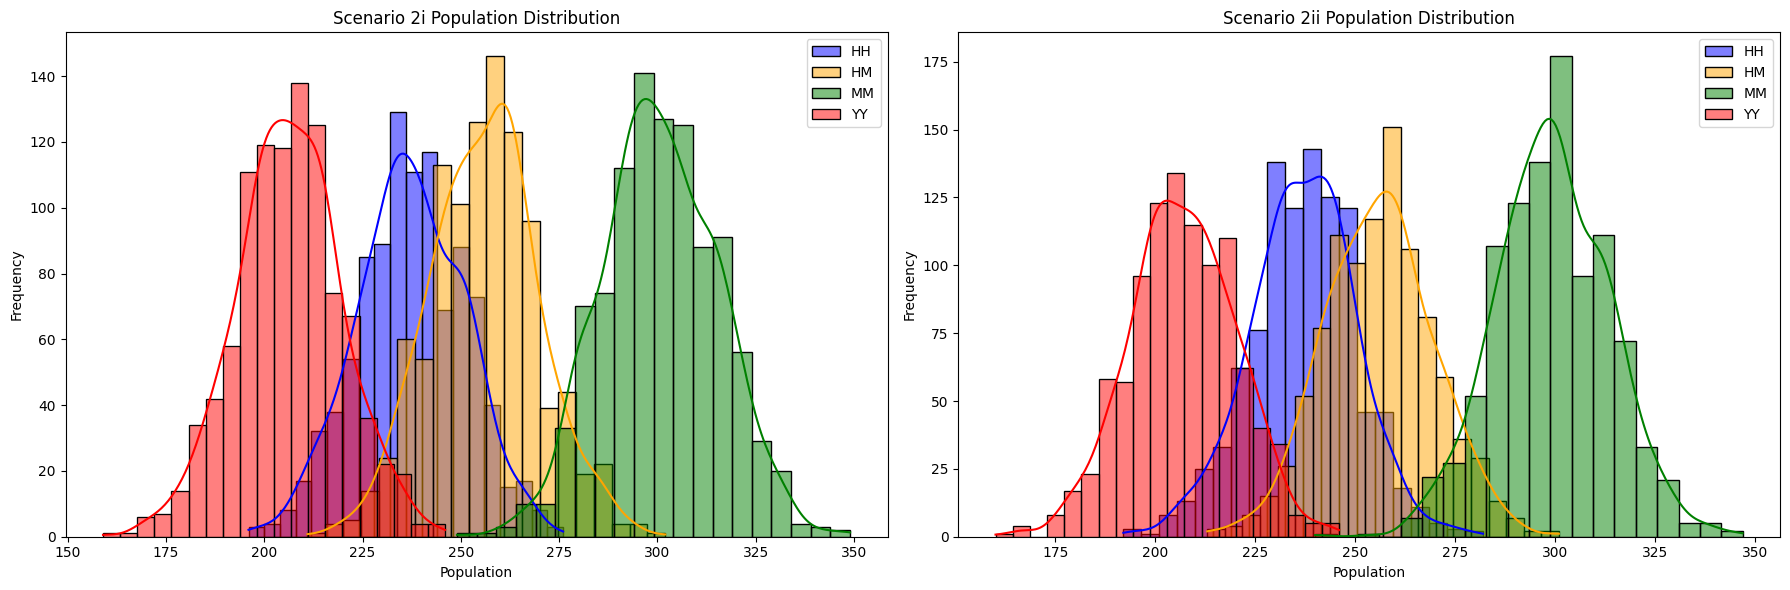

In [86]:
# plot the results in histogram
# First Plot for Scenario 2i
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.histplot(results_i[:, 0], bins=20, alpha=0.5, label='HH', edgecolor='black', kde=True, color='blue')
sns.histplot(results_i[:, 1], bins=20, alpha=0.5, label='HM', edgecolor='black', kde=True, color='orange')
sns.histplot(results_i[:, 2], bins=20, alpha=0.5, label='MM', edgecolor='black', kde=True, color='green')
sns.histplot(results_i[:, 3], bins=20, alpha=0.5, label='YY', edgecolor='black', kde=True, color='red')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Scenario 2i Population Distribution')

# Second Plot for Scenario 2ii
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.histplot(results_ii[:, 0], bins=20, alpha=0.5, label='HH', edgecolor='black', kde=True, color='blue')
sns.histplot(results_ii[:, 1], bins=20, alpha=0.5, label='HM', edgecolor='black', kde=True, color='orange')
sns.histplot(results_ii[:, 2], bins=20, alpha=0.5, label='MM', edgecolor='black', kde=True, color='green')
sns.histplot(results_ii[:, 3], bins=20, alpha=0.5, label='YY', edgecolor='black', kde=True, color='red')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Scenario 2ii Population Distribution')

# Show the plots
plt.tight_layout()
plt.show()